# GCC ssc-resolution: Fourier Ring Correlation (FRC) 

- #### Questions? E-mail gcc@lnls.br or open a ticket internally at SSLinhas

## Install packages

In [11]:
install_packages = False

if install_packages:
    import sscInstall, os
    server = sscInstall.connect_server()
    print("\nThe kernel will restart after installation. Please run the cell again using install_packages = False")
    sscInstall.install_jupyter(server,beamline='caterete',sscCdi='0.4.20',sscPtycho='2.1.1',sscPimega='0.5.3',sscRaft='2.0.1',sscRadon='1.0.0',sscResolution='0.5.5'), os._exit(00) # shutdown kernel. Required to import new installed packages

## Load data

- __path:__ absolute path to a .npy or .tiff file, for instance: /ibira/lnls/beamlines/caterete/proposals/00000000/proc/recons/sample01/sample01.npy
- __start:__ (pixel_row,pixel_column) values to crop the image to squared format. starting positions at the top-left corner
- __size:__ size of the square side
- __use_phantom:__ True if you want to run the algorithm using a test image; False to use your own path

In [12]:
%matplotlib widget
from sscResolution import frc, load_data_for_FC
img = load_data_for_FC(path='',start=(0,0),size=10,use_phantom=True) #

## Inputs for filtering

- __padding:__ padding on the original image (not necessary, can be = 0);
- __sharpness:__ sharpness of the sigmoidal window. The higher the value, the sharper the edge;
- __radius:__ radius of the window from the center of the image;

In [13]:
padding = 0
sharpness = 10
radius = 0.8

## Apply filtering

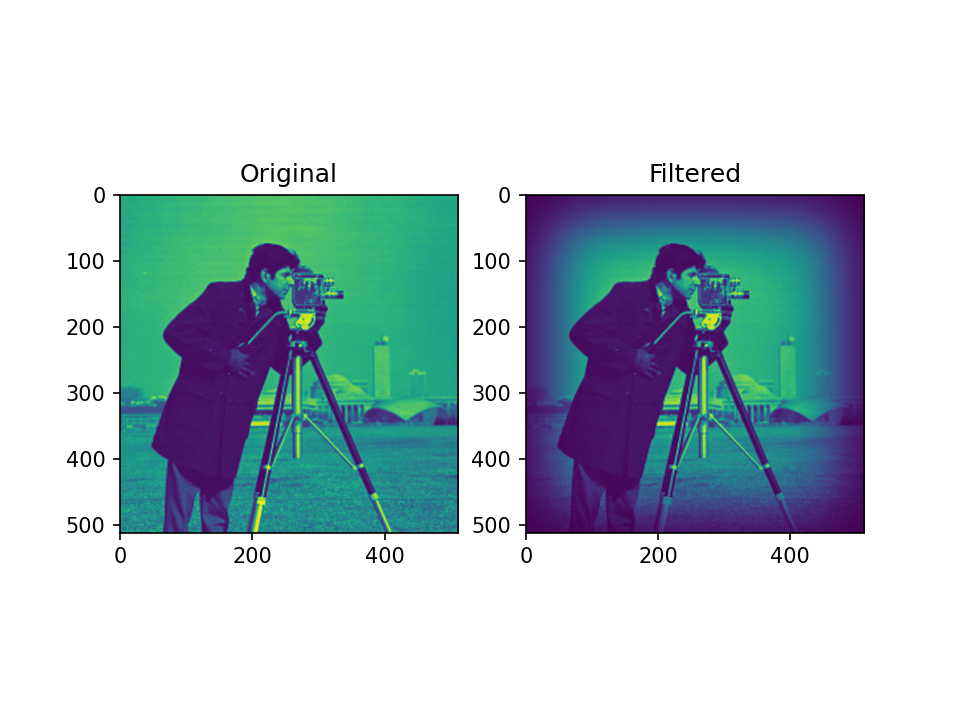

In [14]:
wimg = frc.window( img, padding, [sharpness, radius] )

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(img), ax[0].set_title('Original')
ax[1].imshow(wimg), ax[1].set_title('Filtered') 
plt.show()

## Inputs for FRC

- __cpus:__ number of cpus for FRC calculation;
- __pixel_size:__ pixel size of the object in nanometers

In [9]:
cpus = 1
pixel_size = 10 # nanometers

## FRC Calculation

ssc-resolution: 2x (256, 256) 2D FFT: 0.00417780876159668 sec
ssc-resolution: parallel processing over 128 rings within 0.14590167999267578 sec


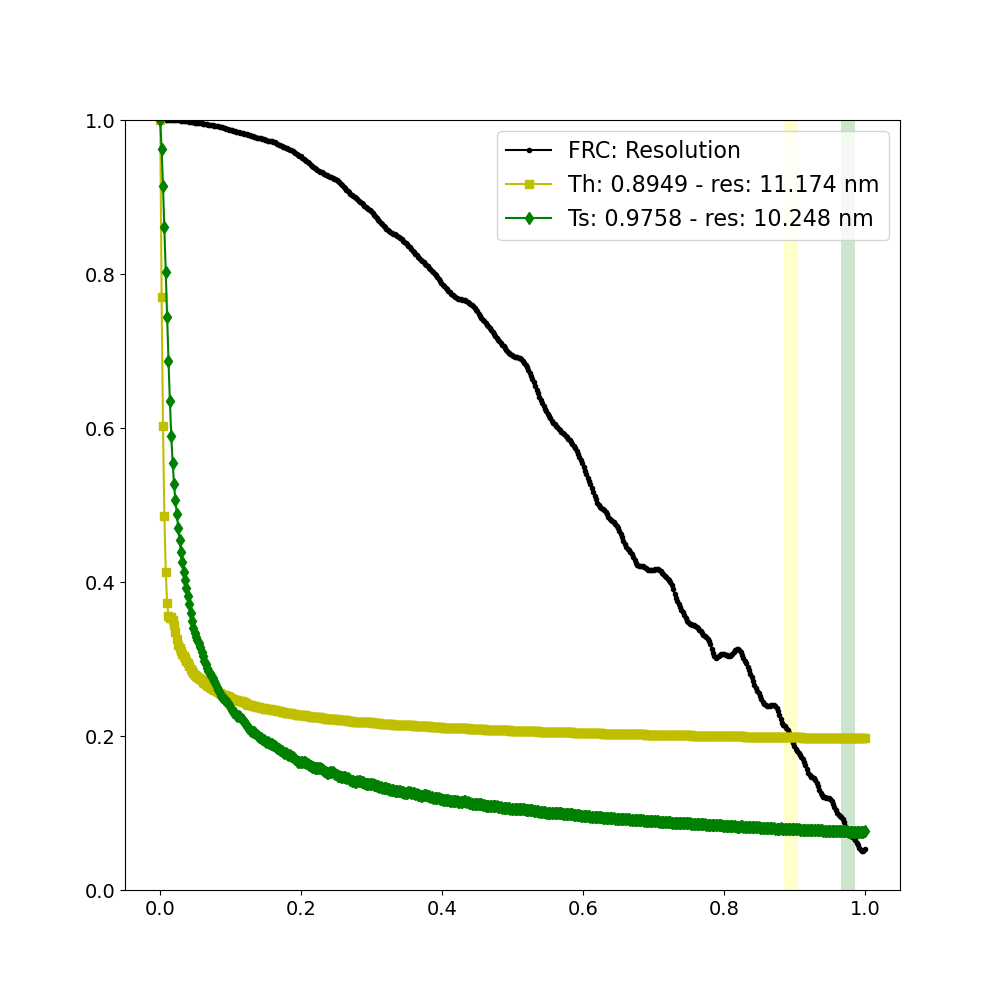

In [15]:
dic = frc.computep( wimg , cpus ) 
frc.plot(dic, {'label': "sample_name", 'unit': "nm", 'pxlsize': pixel_size} )